In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

In [8]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
data[:,0]
hf.close()

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

# Problem 1

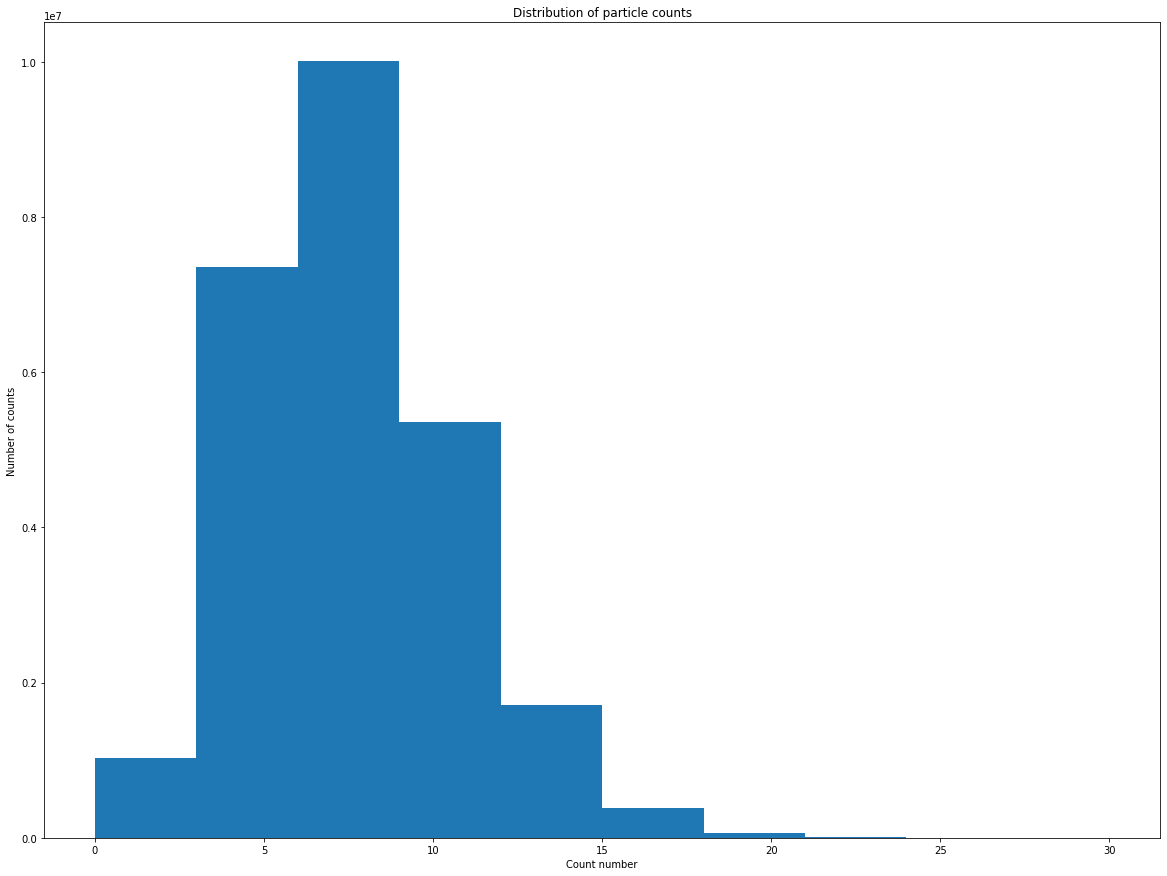

In [18]:
# Part 1
fig, ax = plt.subplots(1,1)
ax.hist(data[3,:])
plt.title("Distribution of particle counts")
plt.ylabel('Number of counts')
plt.xlabel('Count number')
plt.show()

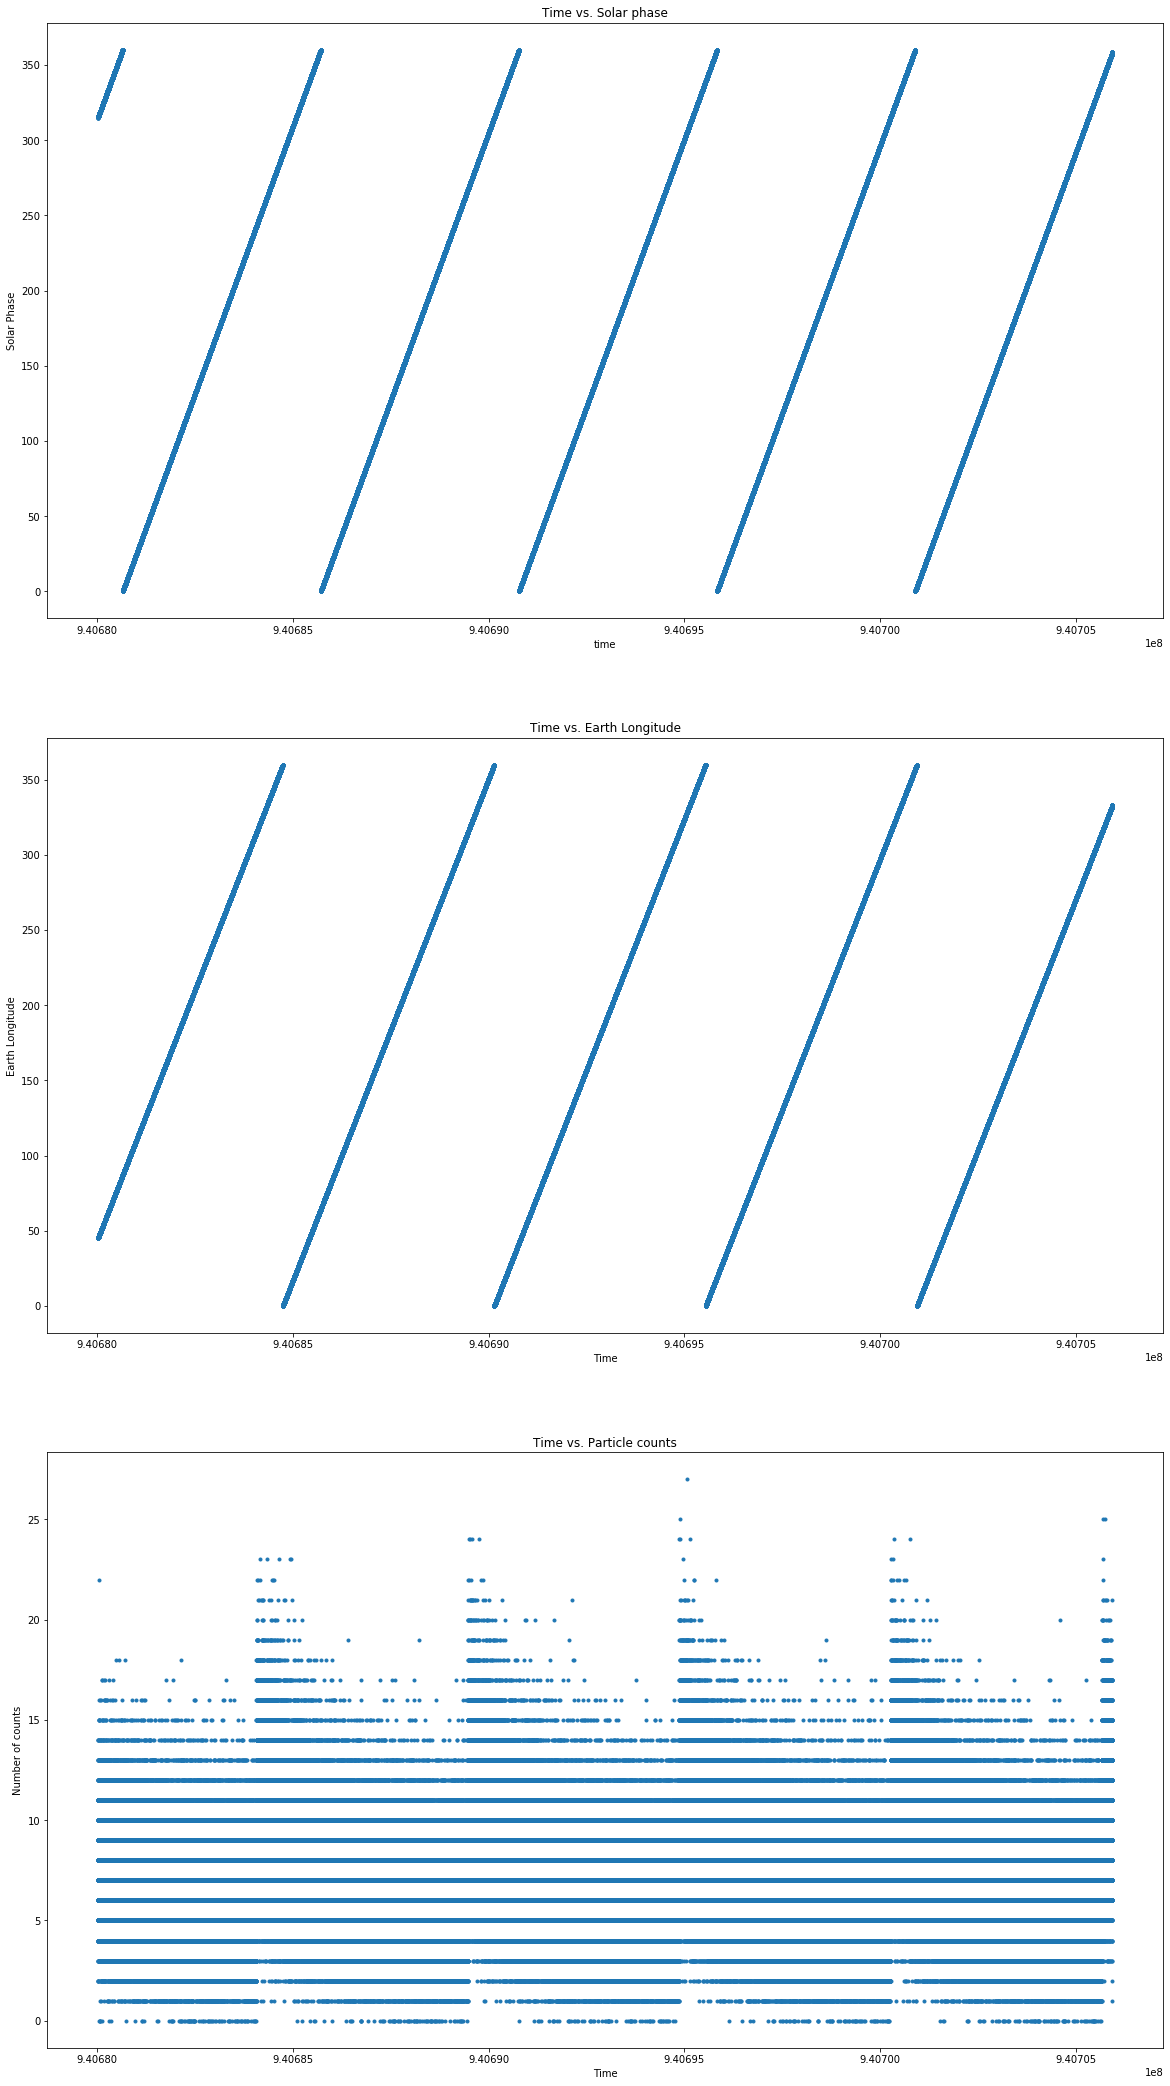

In [35]:
t = data[0]
sp = data[1]
el = data[2]
pc = data[3]
size = int(len(data[0])/100)
plt.subplots_adjust(top=2)
plt.subplot(3, 1, 1)
plt.plot(t[:size], sp[:size], '.')
plt.title("Time vs. Solar phase")
plt.xlabel('time')
plt.ylabel('Solar Phase')
plt.subplot(3, 1, 2)
plt.plot(t[:size], el[:size], '.')
plt.title("Time vs. Earth Longitude")
plt.xlabel('Time')
plt.ylabel('Earth Longitude')
plt.subplot(3, 1, 3)
plt.plot(t[:size],pc[:size], '.')
plt.title("Time vs. Particle counts")
plt.xlabel('Time')
plt.ylabel('Number of counts')
plt.show()

Discussion: As the 2D histogrsm plots that we created which shows that the solar phase has no influence on the counts since the counts stayed constant. However, the longitude will influence the counts distribution and the the mean counts as well. 
There is a signal contamination in my data since there is a discountinuity occurs on the distribution, and since the counts will be influenced by Earth longitude, I think of building a background by knowing the degree of the longitude and then get the background from dataset.

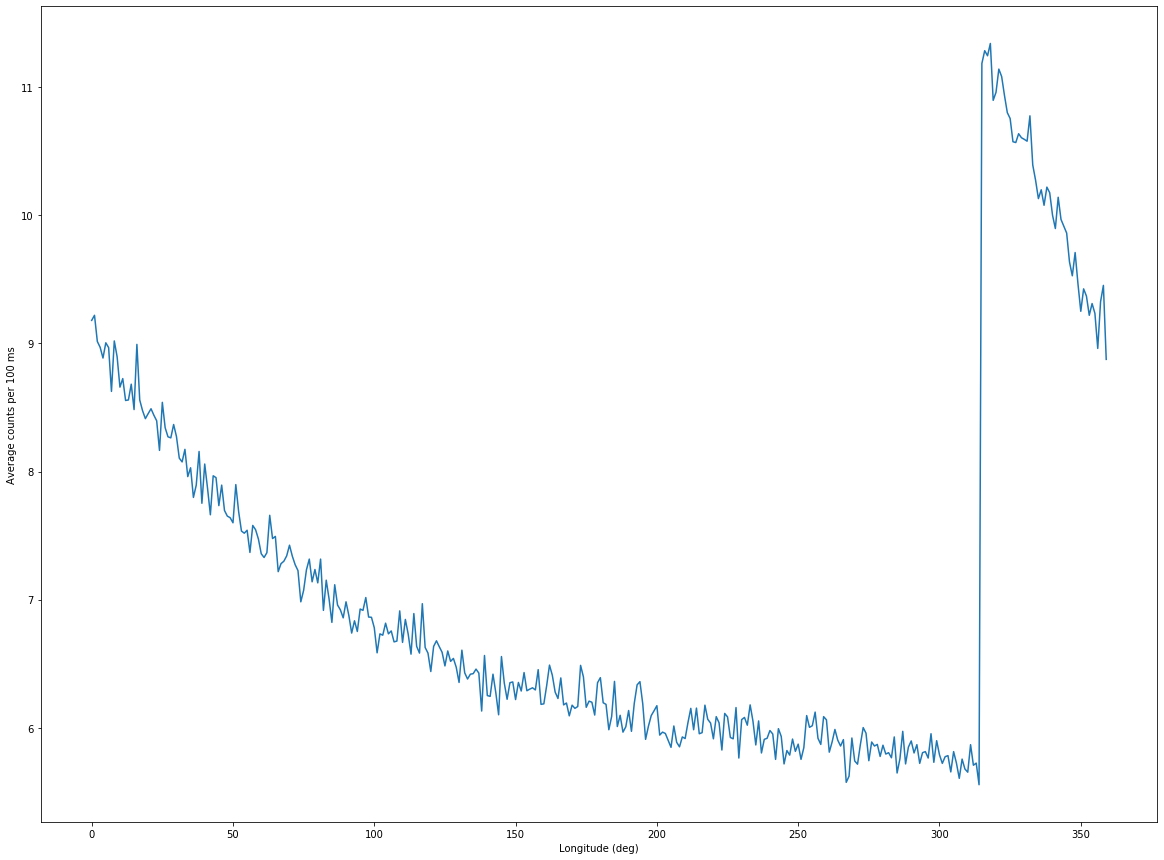

7.089283947408948

In [39]:
means = [np.mean(pc[el==i]) for i in np.arange(360)]
plt.plot(np.arange(360), means)
plt.xlabel("Longitude (deg)")
plt.ylabel("Average counts per 100 ms")
plt.show()
dict(zip(np.arange(360), means))
np.mean(means)

Part 2 Discussion: The background is a poisson distribution and has a range from 5.56 to 11.34 and mean centered at around 7. There is a difference between a continuous change corresponding to the mean of counts. The longitude is spiky and the counts is discountinuous around 300 deg. Since the background varies in longitude, the significance of a GBR is not the same for all time.

# Problem 2

In [27]:

f2 = h5py.File('images.h5', 'r')
stack = xr.DataArray(hf.get('imagestack')[:,:,:], coords=[np.arange(200), np.arange(200),np.arange(10)], dims=['x', 'y', 'image']).transpose('image','x','y')
stack.plot(center=False, col='image', col_wrap=2, size=5)
plt.show()





NameError: name 'xr' is not defined

In [28]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("PDF")
plt.xlim([-5,5])
plt.show()


NameError: name 'stack' is not defined

In [29]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("Log Scale PDF for 10 Images")
plt.yscale("log")
plt.show()

NameError: name 'stack' is not defined

In [30]:
for i in np.arange(10):
    stack[i].plot.hist(bins=1000, density=True, size=5)
    plt.title(f"Log Scale PDF for image {i}")
    plt.yscale("log")
    plt.show()

NameError: name 'stack' is not defined

In [32]:
for i in np.arange(10):
    print(f"max value for image {i}: {np.max(stack[i].values)}")
    print(f"mean value for image {i}: {np.mean(stack[i].values)}")

NameError: name 'stack' is not defined

In [33]:
trimmed_stack = stack.where(stack < 3)
mean = trimmed_stack.mean().values
std = trimmed_stack.std().values
print(f"This estimated background distribution is a Gaussian with a mean of {mean:.3f} and a standard deviation of {std:.3f}")

NameError: name 'stack' is not defined

In [ ]:
img_5sig = stats.norm.isf(five_sig, loc=mean, scale=std)
print(f"A detection of at least {img_5sig:.2f} would be a 5 sigma event")
for i in np.arange(10):
    n = stack[i].where(stack[i] > img_5sig).count().values
    print(f"Number of 5 sigma events for image {i}: {n}")